In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wikisim import rsa

roi_dir = '/Users/morton/Dropbox/work/bender/batch/glm/prex_stim2/roi'

In [2]:
func_rois = rsa.get_rois('func')
pmat_rois = rsa.get_rois('pmat')
all_rois = pd.concat((func_rois, pmat_rois), axis=0)
rois = all_rois.loc[all_rois['net'].isin(['face', 'scene', 'hpc'])].copy()
corr = rsa.load_roi_corr(roi_dir, rois.index)

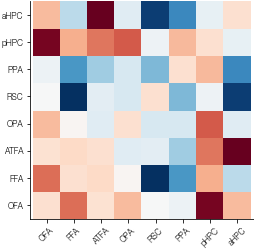

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.pcolor(
    np.mean(corr['face'], 0) - np.mean(corr['scene'], 0), cmap='RdBu_r'
)
ax.axis('equal')
ticks = np.arange(8) + .5
ax.set(
    xticks=ticks, yticks=ticks, xticklabels=rois['roi_label'],
    yticklabels=rois['roi_label']
)
ax.tick_params('x', labelrotation=45)

In [4]:
print(rois)

            roi_label    net net_label  net_id
r_ofa             OFA   face      Face       0
b_ffa             FFA   face      Face       0
b_pat            ATFA   face      Face       0
b_opa             OPA  scene     Scene       1
b_rsc             RSC  scene     Scene       1
b_ppa             PPA  scene     Scene       1
b_fshs_phpc      pHPC    hpc       HPC       1
b_fshs_ahpc      aHPC    hpc       HPC       1


In [5]:
func_rois = rois['roi_label'][:6]
df = {}
diff = corr['face'][:, :, 6:] - corr['scene'][:, :, 6:]
for i, roi in enumerate(func_rois):
    x = diff[:, i, :]
    df[roi] = pd.DataFrame(x, columns=['pHPC', 'aHPC'])

In [8]:
sig_rois = ['ATFA', 'OFA', 'OPA', 'RSC', 'PPA']
sign_rois = [1, -1, -1, -1, -1]
for roi, sign in zip(sig_rois, sign_rois):
    p, p_cor = rsa.sign_perm(
        df[roi].to_numpy() * sign, 100000, method='fwe', tail='right'
    )
    temp = df[roi] * sign
    st = temp.agg(['mean', 'sem'])
    print(roi)
    print(f'pHPC:')
    print(f"mean={st.loc['mean', 'pHPC']}, sem={st.loc['sem', 'pHPC']}, p={p_cor[0]}")
    print(f'aHPC:')
    print(f"mean={st.loc['mean', 'aHPC']}, sem={st.loc['sem', 'aHPC']}, p={p_cor[1]}")
    print()

ATFA
pHPC:
mean=0.03086400313831736, sem=0.033974381743505214, p=0.25108748912510875
aHPC:
mean=0.06886419987831112, sem=0.024323154983990007, p=0.023759762402375977

OFA
pHPC:
mean=-0.06564041737469738, sem=0.024414116140445998, p=0.999120008799912
aHPC:
mean=-0.012972514660058826, sem=0.03427634243210216, p=0.8218117818821812

OPA
pHPC:
mean=-0.03718793847901188, sem=0.02809789589309, p=0.948960510394896
aHPC:
mean=0.023015554995936622, sem=0.03774622093765502, p=0.36026639733602667

RSC
pHPC:
mean=0.017135577682178004, sem=0.02907033430963717, p=0.43628563714362856
aHPC:
mean=0.09062958156054607, sem=0.029403088548758928, p=0.0025999740002599974

PPA
pHPC:
mean=-0.013652698339112299, sem=0.02714041831730031, p=0.8375716242837572
aHPC:
mean=0.06587529486731555, sem=0.031310598621882076, p=0.027079729202707972

